In [159]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import scipy as scipy
from scipy import stats
import seaborn as sns
import math
import calendar
%matplotlib inline

In [160]:
df = pd.read_csv('DSI_kickstarter_data')
print(df.head(2))

   project id                                  name  \
0       39409                 WHILE THE TREES SLEEP   
1      126581  Educational Online Trading Card Game   

                                                 url      category  \
0  http://www.kickstarter.com/projects/emiliesaba...  Film & Video   
1  http://www.kickstarter.com/projects/972789543/...         Games   

          subcategory       location      status     goal  pledged  \
0          Short Film   Columbia, MO  successful  10500.0  11545.0   
1  Board & Card Games  Maplewood, NJ      failed   4000.0     20.0   

   funded percentage  backers                      funded date  levels  \
0           1.099524       66  Fri, 19 Aug 2011 19:28:17 -0000       7   
1           0.005000        2  Mon, 02 Aug 2010 03:59:00 -0000       5   

                          reward levels  updates  comments  duration  
0  $25,$50,$100,$250,$500,$1,000,$2,500       10         2     30.00  
1                     $1,$5,$10,$25,$50        

In [161]:
#pledged mean


print(df['pledged'].mean())

4980.749678963979


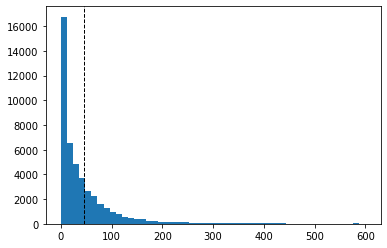

69.97319233196248


In [207]:
#raw distribution of backers

backers = df.loc[df['backers'] <= 600]

ax=plt.subplot()
plt.hist(backers['backers'], bins=50)
plt.axvline(backers['backers'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

print(df['backers'].mean())

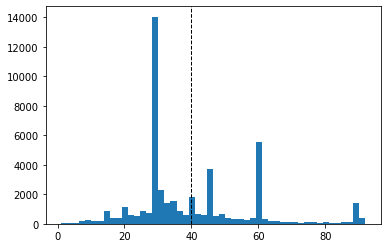

39.9955469242988


In [208]:
#raw distribution of duration

duration = df.loc[df['duration'] <= 1000]

ax=plt.subplot()
plt.hist(duration['duration'], bins=50)
plt.axvline(duration['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

print(df['duration'].mean())

In [193]:
#backers std and mean 

sigma = df['backers'].std()
mu = df['backers'].mean()

print(sigma)
print(mu)
print(df['backers'].max())



688.6284788554608
69.97319233196248
87142


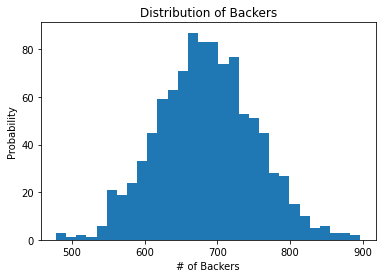

In [163]:
#normal distribution of backers

backers_data = np.random.normal(sigma, mu, 1000)

plt.hist(backers_data, bins=30)
plt.title('Distribution of Backers')
plt.xlabel('# of Backers')
plt.ylabel('Probability')

plt.show()


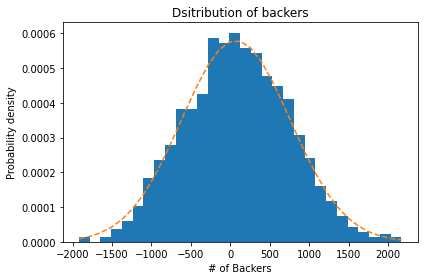

In [164]:
#distribution of backers with best fit line (not familiar with including a best fit line - errors may be present)

x = mu + sigma * np.random.randn(1000)

num_bins = 30

fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=1)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('# of Backers')
ax.set_ylabel('Probability density')
plt.title('Dsitribution of backers')
fig.tight_layout()
plt.show()

In [166]:
#create a bool success variable - status column does not account for sucessful projects that are still live

df['success'] = (df['funded percentage'] >= 1)*1

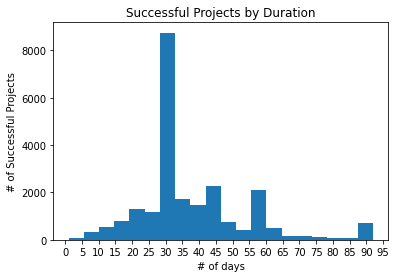

In [209]:
#most successful campaigns by duration

ax=plt.subplot()
plt.hist(df[df.success==1].duration, bins=20)
plt.xticks(range(0, 100, 5))
plt.title('Successful Projects by Duration')
plt.xlabel('# of days')
plt.ylabel('# of Successful Projects');

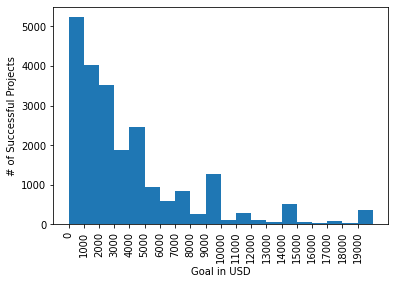

In [210]:
#most successful projects by goal
#remove high outliers, most successful goals are below 20000

successful_goals = df.loc[(df['success']==1) & (df['goal'] <= 20000)]
plt.hist(successful_goals['goal'], bins=20)
plt.xticks(range(0, 20000, 1000))
plt.xticks(rotation=90)
plt.xlabel('Goal in USD')
plt.ylabel('# of Successful Projects')
plt.show()

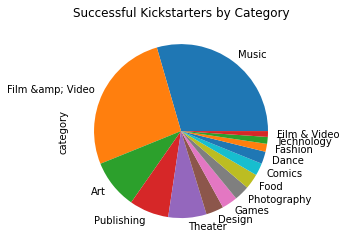

In [211]:
#% most successful projects by category pie chart

ax = (df[df.pledged >= df.goal].category.value_counts()/df[df.pledged >= df.goal].shape[0]*100).plot(kind='pie')
plt.title('Successful Kickstarters by Category')
ax.yaxis.set_major_formatter(PercentFormatter())
plt.show()

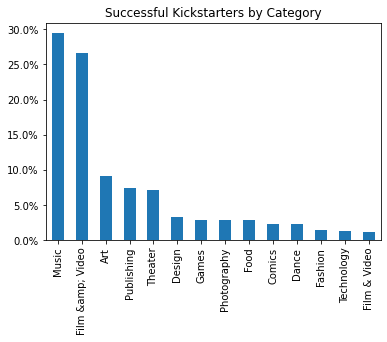

In [212]:
#% most successful projects by category bar chart

ax = (df[df.pledged >= df.goal].category.value_counts()/df[df.pledged >= df.goal].shape[0]*100).plot(kind='bar')
plt.title('Successful Kickstarters by Category')
ax.yaxis.set_major_formatter(PercentFormatter())
plt.show()

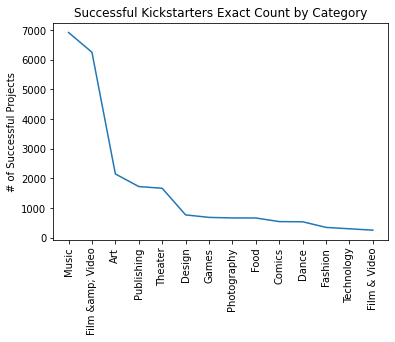

In [213]:
#exact count of most successful projects by category

successful_campaign_counts_category = df[df.pledged >= df.goal].category.value_counts()

plt.plot(successful_campaign_counts_category)
plt.xticks(rotation=90)
plt.title('Successful Kickstarters Exact Count by Category')
plt.ylabel('# of Successful Projects')
plt.show()


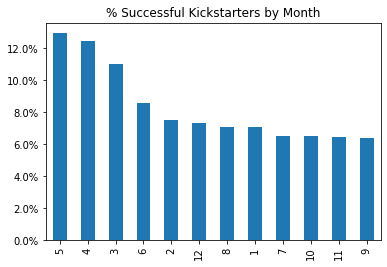

In [214]:
#best month

df['month'] = pd.DatetimeIndex(df['funded date']).month



ax = (df[df.pledged >= df.goal].month.value_counts()/df[df.pledged >= df.goal].shape[0]*100).plot(kind='bar')
plt.title('% Successful Kickstarters by Month')
ax.yaxis.set_major_formatter(PercentFormatter())
plt.show()



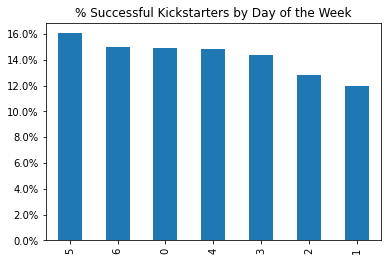

In [82]:
#best day of the week

df['day'] = pd.DatetimeIndex(df['funded date']).dayofweek

ax = (df[df.pledged >= df.goal].day.value_counts()/df[df.pledged >= df.goal].shape[0]*100).plot(kind='bar')
plt.title('% Successful Kickstarters by Day of the Week')
ax.yaxis.set_major_formatter(PercentFormatter())

plt.show()

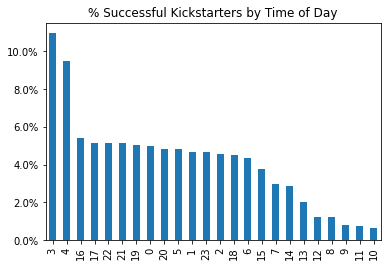

In [84]:
#best time of day

df['time'] = pd.DatetimeIndex(df['funded date']).hour

ax = (df[df.pledged >= df.goal].time.value_counts()/df[df.pledged >= df.goal].shape[0]*100).plot(kind='bar')
plt.title('% Successful Kickstarters by Time of Day')
ax.yaxis.set_major_formatter(PercentFormatter())

plt.show()

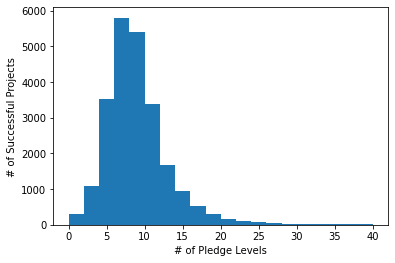

In [94]:
#best number of levels

successful_levels = df.loc[(df['success']==1) & (df['levels'] <= 40)]
plt.hist(successful_levels['levels'], bins=20)
plt.xlabel('# of Pledge Levels')
plt.ylabel('# of Successful Projects')
plt.show()
